In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [249]:
means=titanic_m.Survived.groupby(titanic_m.Sex).mean()
means

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [149]:
titanic_m=titanic.copy()
x=titanic.Survived.mode()[0]
y=titanic.Sex.mode()[0]
titanic_m.Survived=titanic_m.Survived.fillna(x)
titanic_m.Sex=titanic_m.Sex.fillna(y)

means=titanic_m.Survived.groupby(titanic_m.Sex).mean()
titanic_m["Sex_encoded"]=titanic_m.Sex.map(means)
titanic_m

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.188908
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.742038
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [15]:
from sklearn.preprocessing import OneHotEncoder

titanic_onehot=titanic.copy()
x=titanic_onehot.Embarked.mode()[0]
titanic_onehot.Embarked=titanic_onehot.Embarked.fillna(x)

enc = OneHotEncoder(sparse=False)
encoded_features=enc.fit_transform(titanic_onehot[["Embarked"]]).astype(np.uint8)
encoded_features

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [16]:
enc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [25]:
categories=enc.categories_[0].tolist()
pd.DataFrame(encoded_features, columns=categories)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [63]:
titanic.Cabin.value_counts().head(20)
                    

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
F33            3
D              3
E101           3
C22 C26        3
D33            2
C65            2
C92            2
B49            2
E8             2
C52            2
F4             2
B22            2
E67            2
B18            2
E33            2
E25            2
Name: Cabin, dtype: int64

In [86]:
titanic.Cabin.isnull().count()

891

In [93]:
from sklearn.preprocessing import LabelEncoder
titanic_lbl= titanic.copy()
titanic_lbl.Cabin=titanic_lbl.Cabin.fillna("NAN")
titanic_cabin=titanic_lbl.Cabin.astype(str)

enc2=LabelEncoder()
enc2.fit_transform(titanic_cabin)
titanic_lbl["Cabin_Enc"]=enc2.fit_transform(titanic_lbl.Cabin)
display(titanic_lbl)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NAN,S,146
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NAN,S,146
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NAN,S,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NAN,S,146
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NAN,S,146
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,60


# Outlier Handling

#### Fare değişkeni için boxplot çizdiriniz.

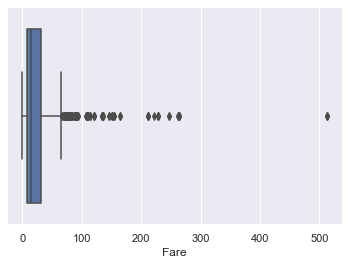

In [183]:
sns.boxplot(titanic.Fare)

#### Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [321]:
t_df=titanic.copy()
z_score=(t_df["Fare"]-t_df["Fare"].mean())/t_df["Fare"].std()
(z_score>3).sum(), (z_score<-3).sum()
z=len(t_df.Fare[(t_df.Fare<lower_value) | (t_df.Fare>upper_value)])
print("Outlier değer sayısı:",z)

Outlier değer sayısı: 20


#### Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [206]:
upper_value=t_df[z_score<=3]['Fare'].max()
lower_value=t_df[z_score>=-3]['Fare'].min()
upper_value,lower_value

(164.8667, 0.0)

In [224]:
t_df_zscore_replaced = titanic.copy()

t_df_zscore_replaced['Fare'][z_score>3] = upper_value
t_df_zscore_replaced['Fare'][z_score<-3] = lower_value

t_df_zscore_replaced['Fare'].max(), t_df_zscore_replaced['Fare'].min()

<ipython-input-224-d8387a321732>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df_zscore_replaced["Fare"][z_score>3] = upper_value
<ipython-input-224-d8387a321732>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df_zscore_replaced["Fare"][z_score<-3] = lower_value


(164.8667, 0.0)

#### Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

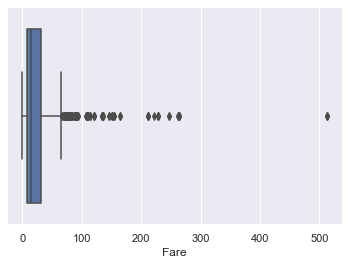

In [298]:
sns.boxplot(t_df.Fare)

In [230]:
q1=t_df['Fare'].quantile(q=0.25)
q3=t_df['Fare'].quantile(q=0.75)
q3-q1

23.0896

In [274]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print("Sınır değerleri:",lower_limit, upper_limit)

Sınır değerleri: -26.724 65.6344


In [275]:
outlier=((titanic["Fare"]<lower_limit) | (titanic["Fare"]>upper_limit))*1
print("Outlier değer sayısı:",outlier.sum())


Outlier değer sayısı: 116


#### Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [290]:
t_outlier=titanic.copy()
t_outlier["Fare"][t_outlier.Fare<lower_limit]=lower_limit
t_outlier["Fare"][t_outlier.Fare>upper_limit]=upper_limit
t_outlier['Fare'].min(), t_outlier['Fare'].max()

<ipython-input-290-5c1c5be2ab6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_outlier["Fare"][t_outlier.Fare<lower_limit]=lower_limit
<ipython-input-290-5c1c5be2ab6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_outlier["Fare"][t_outlier.Fare>upper_limit]=upper_limit


(0.0, 65.6344)

#### Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [304]:
lower=t_df['Fare'].quantile(q=0.01)
upper=t_df['Fare'].quantile(q=0.99)
print("Sınır değerleri:",lower,"&",upper)

Sınır değerleri: 0.0 & 249.00622000000033


In [312]:
x=len(t_df.Fare[(t_df.Fare<lower) | (t_df.Fare>upper)])
print("Outlier değer sayısı:",x)

Outlier değer sayısı: 9


#### Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [316]:
titanic_hard_edges=titanic.copy()
titanic_hard_edges['Fare'][t_df.Fare<lower]=lower
titanic_hard_edges['Fare'][t_df.Fare>upper]=upper
titanic_hard_edges.Fare.min() , titanic_hard_edges.Fare.max()

<ipython-input-316-c2875dab5478>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_hard_edges['Fare'][t_df.Fare<lower]=lower
<ipython-input-316-c2875dab5478>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_hard_edges['Fare'][t_df.Fare>upper]=upper


(0.0, 249.00622000000033)

#### Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [327]:
print("Z-score için sınır değerler:", upper_value," ",lower_value)
print("Z-score için toplam outlier:",z)
print("")
print("IQR için sınır değerler:",lower_limit," ", upper_limit)
print("IQR için toplam outlier:",outlier.sum())
print("")
print("Hard-edges için sınır değerler:",lower," ",upper)
print("Hard-edges için toplam outlier:",x)

Z-score için sınır değerler: 164.8667   0.0
Z-score için toplam outlier: 20

IQR için sınır değerler: -26.724   65.6344
IQR için toplam outlier: 116

Hard-edges için sınır değerler: 0.0   249.00622000000033
Hard-edges için toplam outlier: 9


>Daha çok veriyi koruduğu için Hard-edges yöntemini kullanmak daha mantıklı olabilir.